In [93]:
class City:
    def __init__(self,name,longtitude,latitude):
        self.name = name
        self.longtitude = longtitude
        self.latitude = latitude
class TravelSalesMan:
    def __init__(self,city_list):
        self.city_list = city_list
    def Random_start_city(self):
        return self.city_list[-1]
    def Calc_euclidean_distance(self,city1,city2):
        return ((city1.longtitude-city2.longtitude)**2+(city1.latitude-city2.latitude)**2)**0.5
    def checkSolution(self,solution):
        #make a solution list of city names to append in it and check with the city_list
        if len(solution)!=len(self.city_list):
            return False
        return True
        


In [2]:
# import pandas as pd
# import numpy as np
# data=pd.read_csv('Data set CSV.csv')
# data.head()

,City,x,y
0,1,5.500000e-08,9.860000e-09
1,2,-2.887330e+01,-7.980000e-08
2,3,-7.929160e+01,-2.140330e+01
3,4,-1.465770e+01,-4.338960e+01
4,5,-6.474730e+01,2.189820e+01


In [11]:
def read_csv(file):
    with open(file,'r') as f:
        data = f.readlines()[1:]
        city_list = []
        for line in data:
            line = line.strip().split(',')
            city = City(line[0],float(line[1]),float(line[2]))
            city_list.append(city)
        return city_list
city_list = read_csv('Data set CSV.csv')
# for city in city_list:
#     print(city.name,city.longtitude,city.latitude)

In [107]:
travel = TravelSalesMan(city_list)
city1 = travel.Random_start_city()
visited={city1.name:0}

In [108]:

def make_solution(city1):
    distances = {}
    cities=[]
    for city2 in city_list:
        if city2.name not in list(visited.keys()):
            cities.append(city2)
    for city2 in cities:
        distance=travel.Calc_euclidean_distance(city1,city2)
        #print(distance)
        if distance!=0:
            distances[city2.name]=distance
    distances = dict(sorted(distances.items(),key=lambda x:x[1]))

    first_city=list(distances.keys())[0]
    visited[first_city]=distances[first_city]
while True:
    x=list(visited.keys())[-1]
    index=int(x)-1
 
    make_solution(city_list[index])
    if travel.checkSolution(visited.keys()):
        break
   
print(visited)

{'15': 0, '9': 10.318773936321119, '5': 20.358579404342038, '7': 22.92069009063996, '3': 22.75820510045028, '12': 20.412598306928, '14': 10.401326935540487, '10': 22.760032284687117, '8': 14.549321997261593, '6': 22.70224944471363, '4': 14.401837905281393, '11': 20.63515020221954, '1': 28.72962105340484, '13': 22.710147825297707, '2': 10.390598409359272}


In [111]:
sum(visited.values())

264.04913289644696

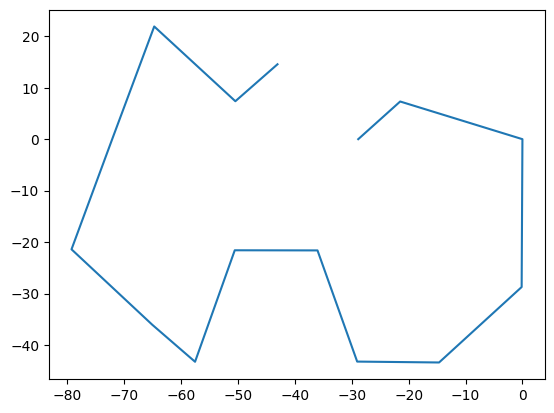

In [113]:
import matplotlib.pyplot as plt
x=[]
y=[]
for city in visited.keys():
    x.append(city_list[int(city)-1].longtitude)
    y.append(city_list[int(city)-1].latitude)
plt.plot(x,y)
plt.show()